In [2]:
!pip3 install imbalanced-learn

     |████████████████████████████████| 189 kB 26.6 MB/s eta 0:00:01


### Set up Synthetic Imbalanced Data

In [13]:
# check version number
import imblearn
import sklearn
from sklearn.datasets import make_classification

print(imblearn.__version__)

0.8.1


In [14]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [16]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


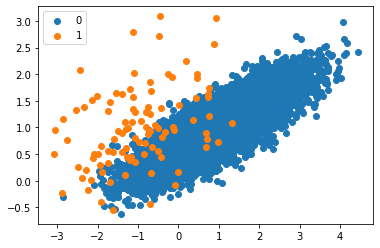

In [18]:
from matplotlib import pyplot
from numpy import where

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Oversample to be Equal Distribution

In [20]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [21]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


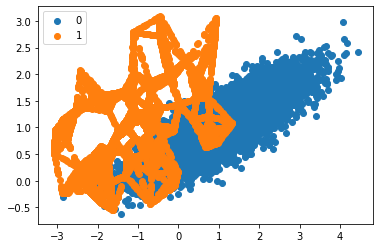

In [22]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()